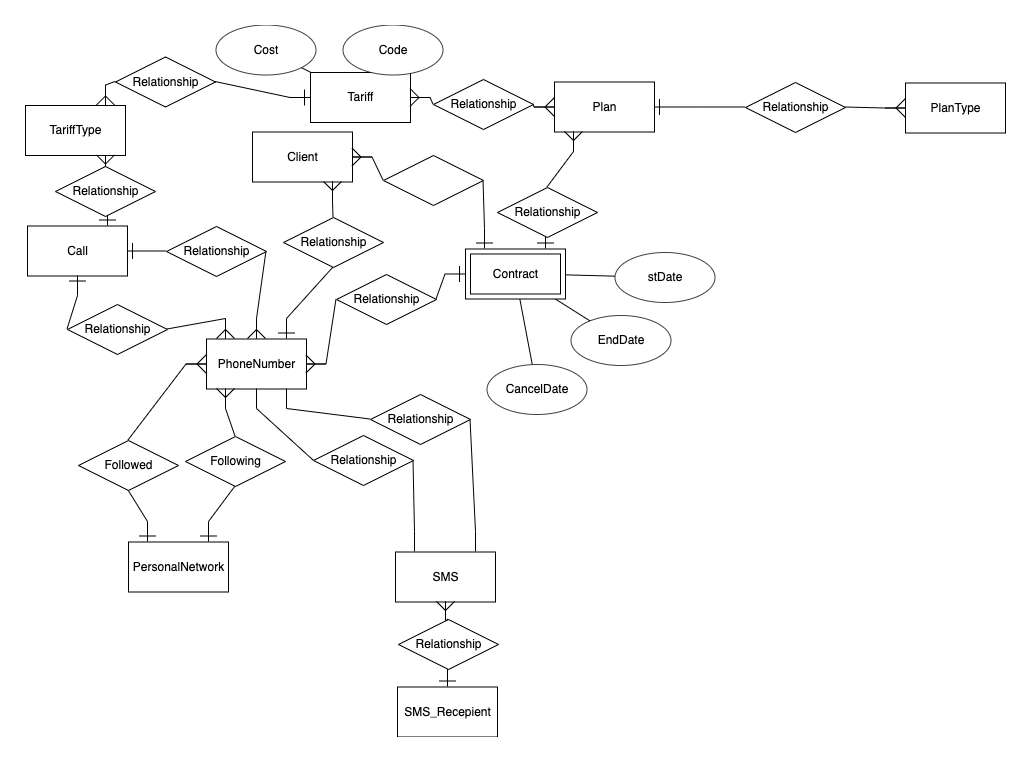

In [4]:
create DATABASE TelcoDB

Commands completed successfully.

Total execution time: 00:00:00.734

In [5]:
use TelcoDB

Commands completed successfully.

Total execution time: 00:00:00.033

In [6]:
create table Client(
    Id int identity PRIMARY key,
    FirstName nvarchar(50) not null,
    LastName nvarchar(50) not null,
    ClientAddress nvarchar(150) null
);

create table PlanType(
    Id int identity PRIMARY key,
    PlanTypeName nvarchar(50) not null,
    Info nvarchar(50)
);

create table ContractPlan(
    Id int identity PRIMARY key,
    PlanName nvarchar(50) not null,
    PlanTypeId int not null references PlanType(Id)
);

Commands completed successfully.

Total execution time: 00:00:00.031

In [7]:
create table PhoneNumber(
    Id int identity PRIMARY key,
    ClientId int not null REFERENCES Client(Id),
    PhoneNumber varchar(20) not null UNIQUE,
    DateCreated datetime not null default GETUTCDATE()
);

create table Contract(
    Id int identity PRIMARY key,
    ClientId int not null REFERENCES Client(Id),
    ContractPlanId int not null REFERENCES ContractPlan(Id),
    PhoneNumberId int not null REFERENCES PhoneNumber(Id),
    Content nvarchar(max) null,
    StartDate datetime not null,
    EndDate datetime null,
    CancellationDate datetime null
);



create table Call(
    Id int identity PRIMARY key,
    CallingPhoneNumberId int not null REFERENCES PhoneNumber(Id),
    CalledPhoneNumberId int not null REFERENCES PhoneNumber(Id),
    StartDate datetime not null  default GETUTCDATE(),
    EndDate datetime null,
    DurationSeconds as datediff(second, StartDate, EndDate));



create table PersonalNetwork(
    Id int identity PRIMARY key,
    FollowerPhoneNumberId int not null REFERENCES PhoneNumber(Id),
    FollowedPhoneNumberId int not null REFERENCES PhoneNumber(Id),
    StartDate datetime not null  default GETUTCDATE(),
    EndDate datetime null);


create table SMS(
    Id int identity PRIMARY key,
    SenderPhoneNumberId int not null REFERENCES PhoneNumber(Id),
    Content nvarchar(max) not null,
    DateCreated datetime not null  default GETUTCDATE());


create table SMS_Recipient(
    Id int identity PRIMARY key,
    SMSId int not null REFERENCES SMS(Id),
    RecepientPhoneNumberId int not null REFERENCES PhoneNumber(Id),
    DateReceived datetime not null  default GETUTCDATE());














Commands completed successfully.

Total execution time: 00:00:00.050

In [8]:
create table TariffType(
    Id int identity PRIMARY key,
    TariffTypeName nvarchar(50) not null,
    Info nvarchar(50)
);

create table Tariff(
    Id int identity PRIMARY key,
    TarifName nvarchar(50) not null,
    TariffTypeId int not null references TariffType(Id)
);


create table ContractPlan_Tariff(
    Id int identity PRIMARY key,
    ContractPlanId int not null references ContractPlan(Id),
    TariffId int not null references Tariff(Id)
);




Commands completed successfully.

Total execution time: 00:00:00.030

In [9]:
ALTER table Call add TariffId int null references Tariff(Id);


Commands completed successfully.

Total execution time: 00:00:00.012

In [10]:
update Call
set TariffId=1
where TariffId is null;

ALTER table Call alter column TariffId int not null;

(0 rows affected)

Total execution time: 00:00:00.018

In [11]:
ALTER table SMS_Recipient add TariffId int null references Tariff(Id);


Commands completed successfully.

Total execution time: 00:00:00.008

In [12]:
alter table ContractPlan
add MonthlyCost float null,
    ContractCode nvarchar(20);

Commands completed successfully.

Total execution time: 00:00:00.009

In [13]:
create table ClientType(
    Id int identity PRIMARY key,
    ClientTypeName nvarchar(50) not null
);

alter table Client add ClientTypeId int foreign key REFERENCES ClientType(Id);

Commands completed successfully.

Total execution time: 00:00:00.019

In [14]:
create table AdditionalService(
    Id int identity PRIMARY key,
    AdditionalService nvarchar(50) not null,
    Info nvarchar(500) not null
);
create table ClientType_AdditionalService(
    Id int identity PRIMARY key,
    AdditionalServiceId int references AdditionalService(Id),
    ClientTypeId int references ClientType(Id),
    Cost float DEFAULT 0
);














Commands completed successfully.

Total execution time: 00:00:00.016

In [25]:
create table Employee(
    Id int identity PRIMARY key,
    FirstName nvarchar(50) not null,
    LastName nvarchar(50) not null,
    SSN varchar(20) not null unique,
    EmploymentDate date,
    EducationLevel nvarchar(20) null, --could be a table
);


: Msg 2714, Level 16, State 6, Line 1
There is already an object named 'Employee' in the database.

Total execution time: 00:00:00.005

In [16]:
alter table Employee
add CurrentManagerId int REFERENCES Employee(Id);

Commands completed successfully.

Total execution time: 00:00:00.017

In [28]:
insert into Employee
values('X','X','201531','2011-01-01','college',null);
select * from Employee;

(1 row affected)

(1 row affected)

Total execution time: 00:00:00.055

Id,FirstName,LastName,SSN,EmploymentDate,EducationLevel,CurrentManagerId
1,X,X,201531,2011-01-01,college,NULL


In [17]:
create table Manager(
    -- Id int identity PRIMARY key,
    EmployeeId int not null primary key REFERENCES Employee(Id),
    PromotionDate date,
    Title nvarchar(50)
    )

-- this is also correct
-- alter table Employee
-- add ManagerId int REFERENCES Manager(EmployeeId);



Commands completed successfully.

Total execution time: 00:00:00.010

In [18]:
create table Course(
    Id int identity PRIMARY key,
    EmployeeId int not null REFERENCES Employee(Id),
    CourseName nvarchar(50) not null)

create table Language(
    Id int identity PRIMARY key,
    EmployeeId int not null REFERENCES Employee(Id),
    LanguageName nvarchar(50) not null)
















Commands completed successfully.

Total execution time: 00:00:00.017

In [19]:
alter table Employee add CONSTRAINT Employee_employment_date CHECK (EmploymentDate > "2010-01-01");

: Msg 207, Level 16, State 1, Line 1
Invalid column name '2010-01-01'.

Total execution time: 00:00:00.005

inserting values with 'x' not double !!!